# BTYD - quickstart
## Use dataset provided via lifetimes package

In [12]:
import pandas as pd
import numpy as np

from scipy.stats import poisson
import matplotlib.pyplot as plt

In [8]:
from lifetimes.datasets import load_transaction_data
from lifetimes.utils import summary_data_from_transaction_data

transaction_data = load_transaction_data()

print(transaction_data.head())

                  date  id
0  2014-03-08 00:00:00   0
1  2014-05-21 00:00:00   1
2  2014-03-14 00:00:00   2
3  2014-04-09 00:00:00   2
4  2014-05-21 00:00:00   2


In [10]:
summary = summary_data_from_transaction_data(transaction_data, 'id', 'date', observation_period_end='2014-12-31')
print(summary.head())

    frequency  recency      T
id                           
0         0.0      0.0  298.0
1         0.0      0.0  224.0
2         6.0    142.0  292.0
3         0.0      0.0  147.0
4         2.0      9.0  183.0


## BTYD model assumptions:
### 1. *While active, transactions made by a customer in time period <font color='red'>t</font> is Poisson distributed with mean <font color='red'>λt</font>*

### **Poisson distribution**

### Let's consider 3 customers each with different purchasing frequency.
* Customer_1 - Average 2 transactions per week
* Customer_2 - Average 3 transactions per week
* Customer_3 - Average 1 transactoin per week

Based on this information let's plot probability mass function for each customer

In [56]:
lambdas = [2,5,8]

probabilites = []

for lam in lambdas:
    probabilites.append(list(poisson.pmf(k=[range(0,20)], mu= lam)[0]))

In [88]:
poisson.pmf(k=6, mu= 5)

0.1462228081398754

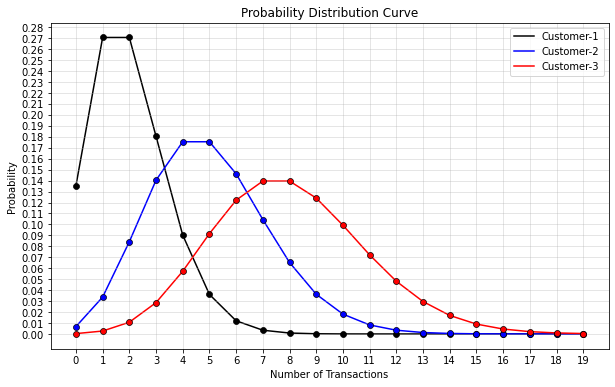

In [87]:
plt.figure(figsize=(10,6))

plt.ylabel('Probability')
plt.xlabel('Number of Transactions')

plt.xticks(range(0, 20))
plt.yticks(np.arange(0, 0.50, 0.01))

plt.title('Probability Distribution Curve')

plt.plot(probabilites[0], color='black', linewidth=1.5, zorder=1, label='Customer-1')
plt.scatter(range(0, 20), probabilites[0], color='black', edgecolor='black', linewidth=0.7, zorder=2)

plt.plot(probabilites[1], color='blue', linewidth=1.5, zorder=1, label='Customer-2')
plt.scatter(range(0, 20), probabilites[1], color='blue', edgecolor='black', linewidth=0.7, zorder=2)

plt.plot(probabilites[2], color='red', linewidth=1.5, zorder=1, label='Customer-3')
plt.scatter(range(0, 20), probabilites[2], color='red', edgecolor='black', linewidth=0.7, zorder=2)

plt.legend()
plt.grid(alpha=0.4)
plt.show()

For example *Customer-2* made 5 purchases per week (λ=5), so the probability of 6 transaction being made by this customer in next week quals to 14,6%